# Walkthrough

In [1]:
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np

In [2]:
from classes import preprocess, eda, LDA, KMeansClustering, sentiment_analysis, models

c:\users\mdfl0\appdata\local\programs\python\python39\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mdfl0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


shape of dataframe:  (5997, 3)
shape of dataframe:  (5997, 5)


# Data preparation (with\out duplicates)


In [22]:
free_tuition = preprocess(df='raw data/Free Tuition Comments.csv',added_stopwords='freetuition_stopwords.csv', 
                                       sent_column=['CONTEXT-BASED'], 
                                       comment_column='Comment', dups=1, drop=['Video Link', 'Comment Image Rate'])

shape of dataframe:  (898, 5)
shape of dataframe:  (898, 7)
drop


In [4]:
free_tuition.df['CONTEXT-BASED'].value_counts()

1.0    328
2.0    254
0.0    115
Name: CONTEXT-BASED, dtype: int64

In [5]:
free_tuition.df.head()

,Comment,Comment type,CONTEXT-BASED,Account,Timestamp,features,features_string_format
0,"free tuition nga, pero may grade req's. Pinipi...",neutral,1.0,jqcrypto,"July 11, 2023, 21:21","[free, tuition, grade, reqs, pinipili, makpsok...",free tuition grade reqs pinipili makpsok magag...
1,ngi bat ngayon molang alam haha,neutral,1.0,jqcrypto,"July 11, 2023, 21:21","[ngi, bat, molang, alam]",ngi bat molang alam
2,hala now niyo lang po nalaman . free tuition n...,neutral,2.0,jqcrypto,"July 11, 2023, 21:21","[hala, niyo, nalaman, free, tuition, tapos, bi...",hala niyo nalaman free tuition tapos binibigay...
3,sana madagdagan for nursing. isa sa mga pinaka...,neutral,1.0,jqcrypto,"July 11, 2023, 21:21","[sana, madagdagan, nursing, pinaka, important,...",sana madagdagan nursing pinaka important profe...
4,"Nastop ang UNIFAST now, SYC 2021-2022 up until...",neutral,1.0,jqcrypto,"July 11, 2023, 21:21","[nastop, unifast, syc, 20212022, wala, padin, ...",nastop unifast syc 20212022 wala padin update ...


# Non Duplicate values (context base)

## Phase 1: Free tuition

### A. Facts and analysis

In [6]:
df1 = free_tuition.df

In [7]:
eda_non_duplicates = eda(df1, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')

In [8]:
# total number of comments
eda_non_duplicates.df['features_string_format'].notnull().sum().sum()

731

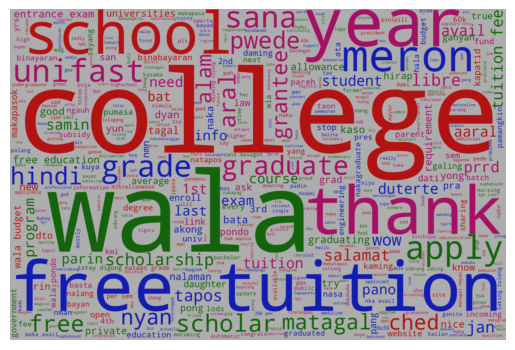

In [9]:
eda_non_duplicates.generate_wordcloud(filename='all_comment_context_base_free_tuition')

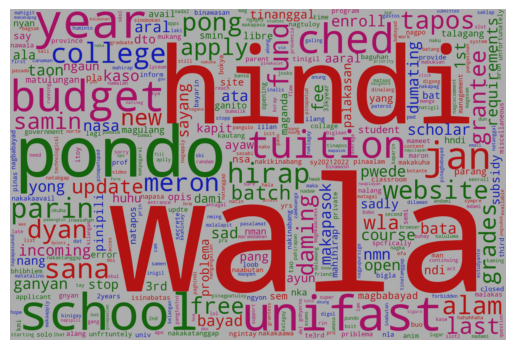

In [10]:
eda_non_duplicates.generate_wordcloud('negative_context_base_free_tution', 'CONTEXT-BASED', 0.0)

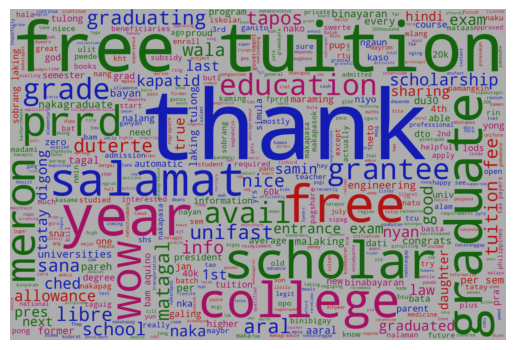

In [11]:
eda_non_duplicates.generate_wordcloud('positive_context_base_free_tution', 'CONTEXT-BASED', 2.0)

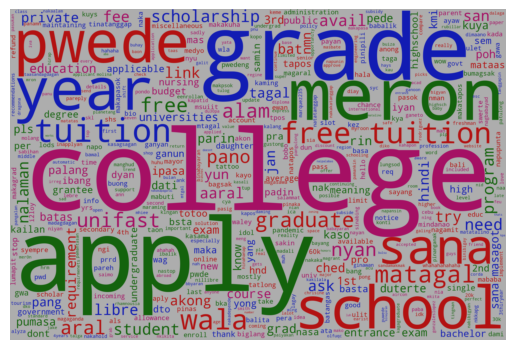

In [12]:
eda_non_duplicates.generate_wordcloud('neutral_context_base_free_tution', 'CONTEXT-BASED', 1.0)

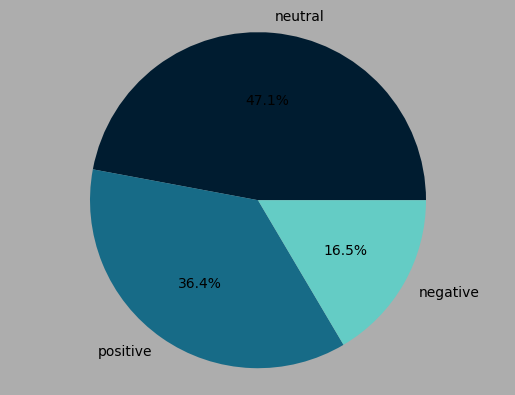

In [13]:
eda_non_duplicates.pie_sentiment('context_base_free_tution', 'CONTEXT-BASED')

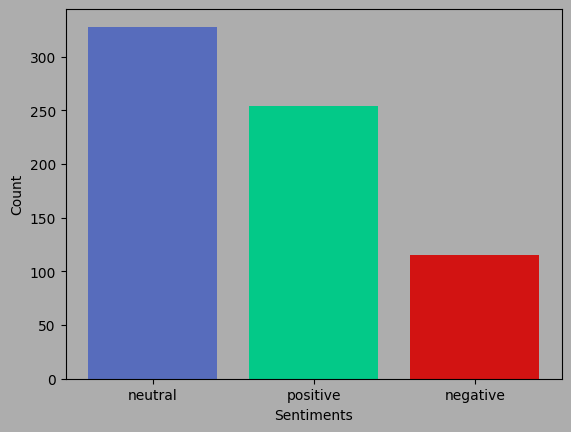

In [14]:
eda_non_duplicates.bar_sentiment('context_base_free_tution', 'CONTEXT-BASED')

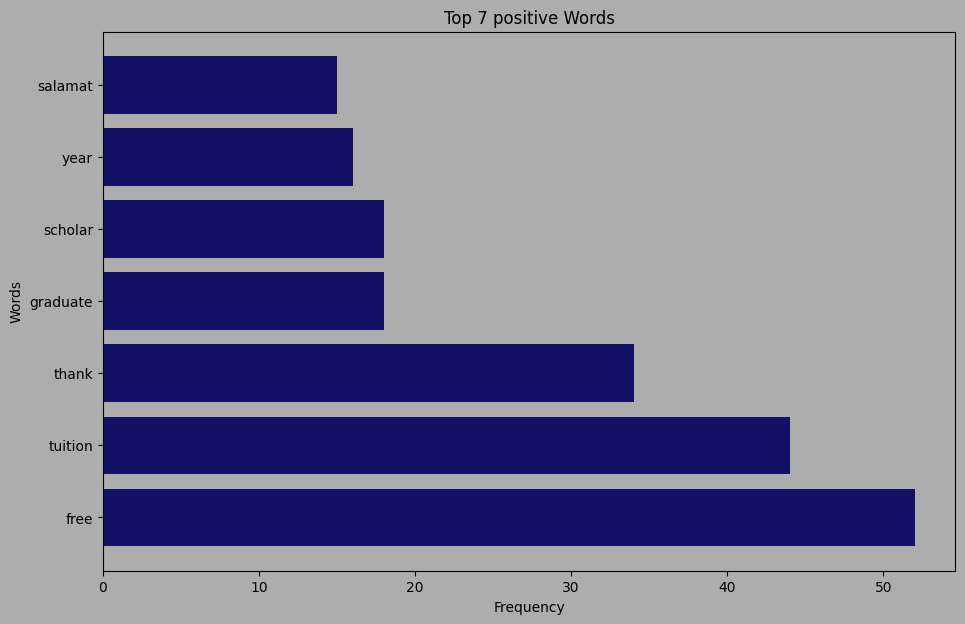

In [15]:
# top 5 positive comments
x = df1[df1['CONTEXT-BASED'] == 2]
positive = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
positive.top_words(7, 'positive', 'positive_context_base_free_tution')

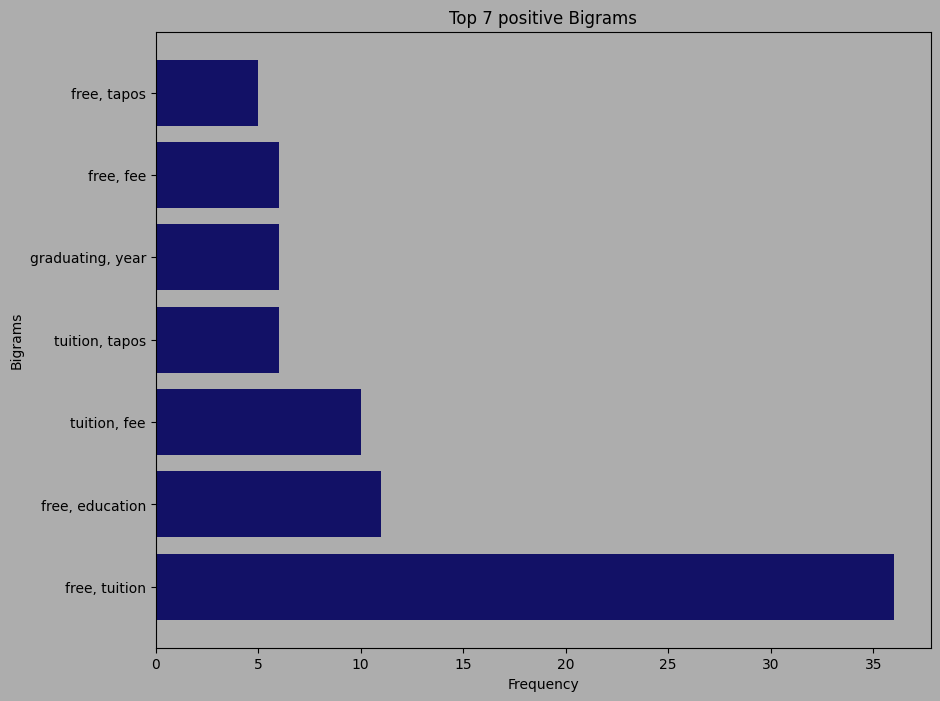

In [16]:
# top 5 positive bigrams
positive.bigrams(7, 'positive', 'positive_context_base_free_tution')

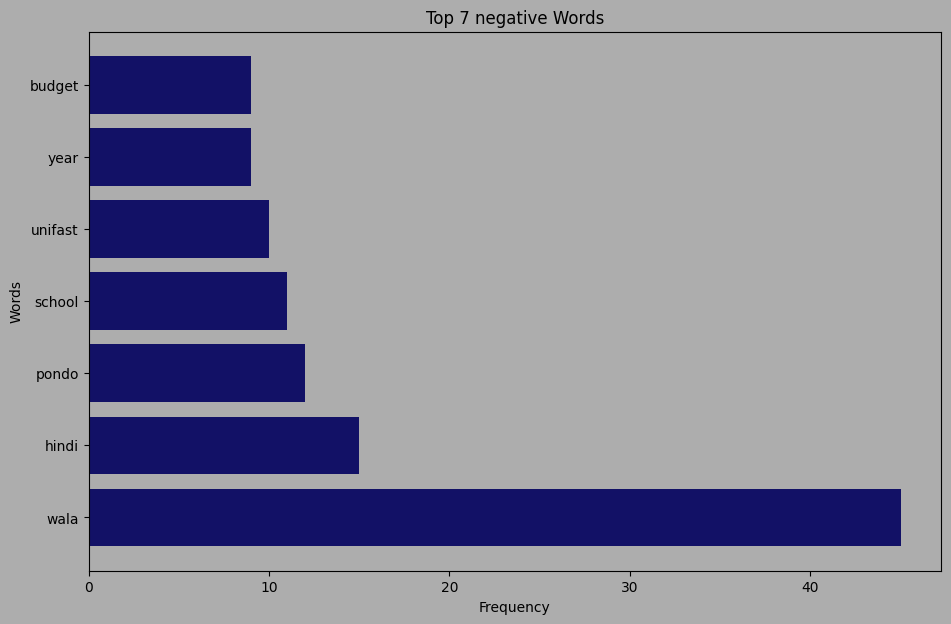

In [17]:
# top 5 negative comments
x = df1[df1['CONTEXT-BASED'] == 0.0]
negative = eda(x, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
negative.top_words(7, 'negative', 'negative_context_base_free_tution')

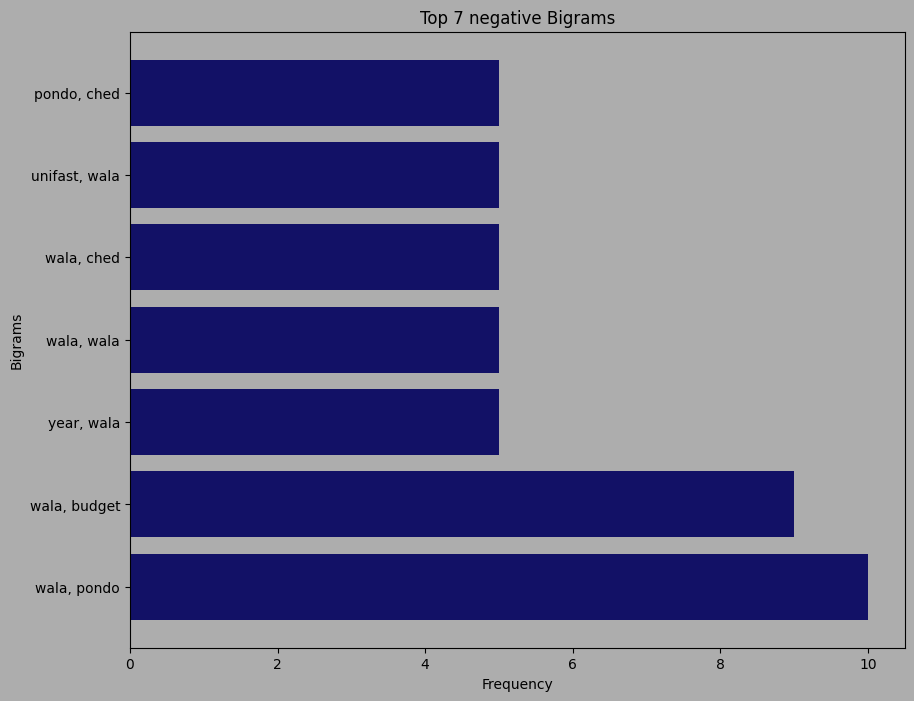

In [18]:
# top 5 negative bigrams 
negative.bigrams(7, 'negative', 'negative_context_base_free_tution')

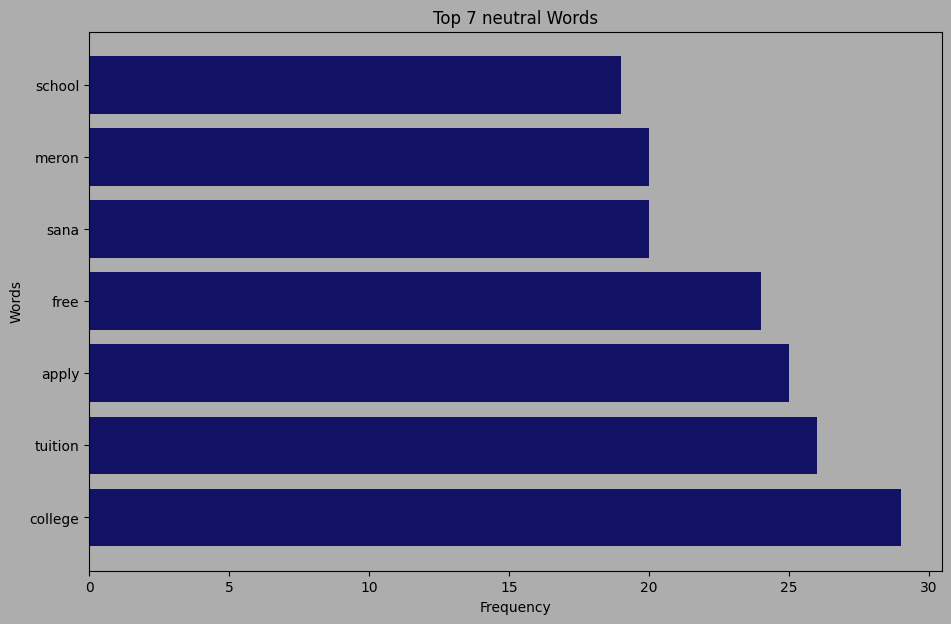

In [19]:
# top 5 neutral comments
z = df1[df1['CONTEXT-BASED'] == 1.0]
neutral = eda(z, text_column_name='features_string_format', sent_column_name='CONTEXT-BASED')
neutral.top_words(7, 'neutral', 'neutral_context_base_free_tution')

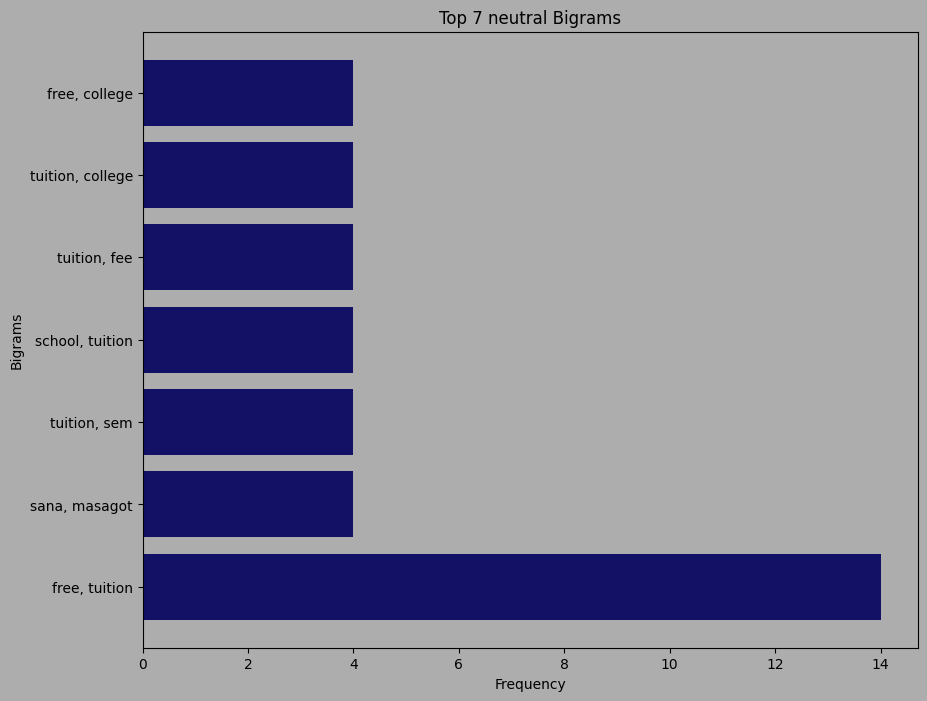

In [20]:
# top 5 negative comments _context_base_bam_related
neutral.bigrams(7, 'neutral', 'neutral_context_base_free_tution')

# Train the model and analyse the data

In [3]:
df = pd.read_csv('balanced_data_context3.9k.csv')

In [4]:
df.head()

,Unnamed: 0,Comment,category
0,758,rin,1.0
1,43,omg embarassing shet,1.0
2,721,quality worth price,1.0
3,652,san meron naic ganyan,1.0
4,306,nothing special need vga cable cctv system mon...,1.0


In [5]:
# create a model for related to bam and context based
x = models(df=df, x='Comment', y='category', filename='context_base_free_tuition')

In [6]:
x.svm()

svm or dectree
Accuracy: 0.7115384615384616
F1 score (micro): 0.7115384615384616
F1 score (macro): 0.7133506555941822
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.61      0.64       260
           1       0.88      0.81      0.84       260
           2       0.62      0.72      0.66       260

    accuracy                           0.71       780
   macro avg       0.72      0.71      0.71       780
weighted avg       0.72      0.71      0.71       780



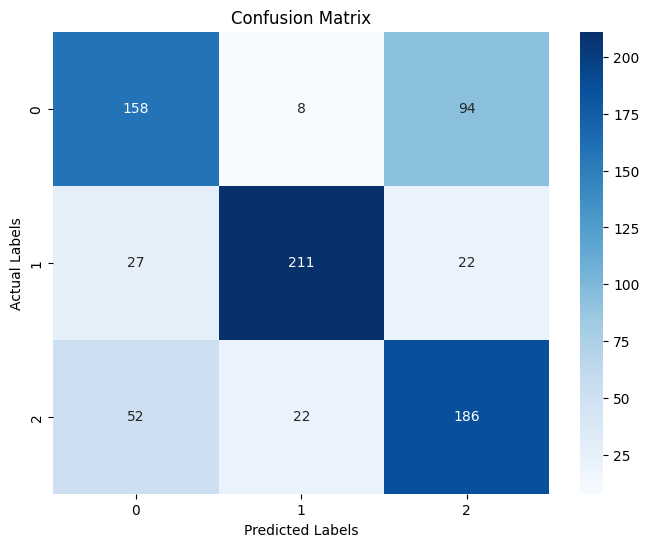

In [7]:
x.evaluate_model()

In [9]:
y = models(df=df, x='Comment', y='category', filename='context_base_free_tuition')

In [10]:
y.decision_tree()

svm or dectree
Accuracy: 0.6192307692307693
F1 score (micro): 0.6192307692307693
F1 score (macro): 0.6133507974395619
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.69      0.61       260
           1       0.71      0.74      0.72       260
           2       0.61      0.43      0.51       260

    accuracy                           0.62       780
   macro avg       0.62      0.62      0.61       780
weighted avg       0.62      0.62      0.61       780



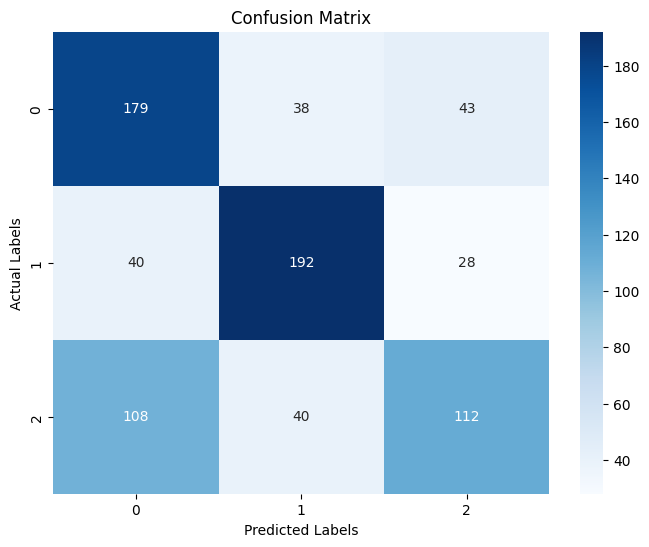

In [11]:
y.evaluate_model()

In [5]:
z = models(df=df, x='Comment', y='category', filename='context_base_free_tuition')

In [6]:
z.random_forest()

svm or dectree
Accuracy: 0.6858974358974359
F1 score (micro): 0.6858974358974359
F1 score (macro): 0.6833452601319694
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62       260
           1       0.75      0.82      0.78       260
           2       0.63      0.67      0.65       260

    accuracy                           0.69       780
   macro avg       0.68      0.69      0.68       780
weighted avg       0.68      0.69      0.68       780



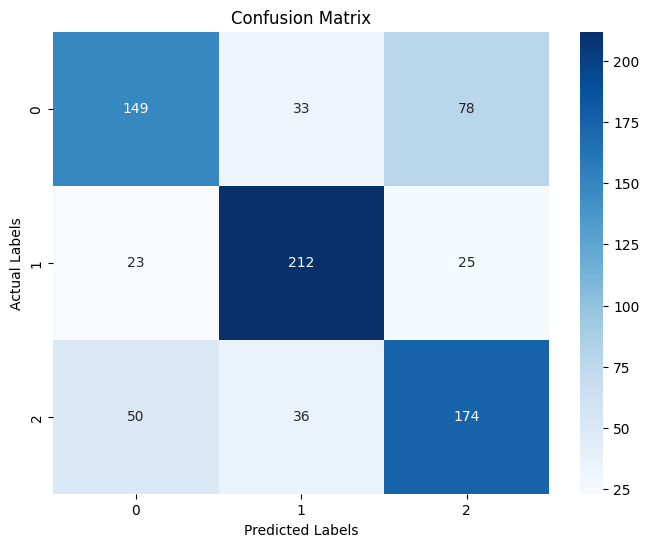

In [7]:
z.evaluate_model()

In [23]:
# end of program